In [14]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact,fixed,FloatSlider
import pandas as pd
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
from matplotlib.patches import FancyArrowPatch,Rectangle,Circle
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import proj3d
import mpl_toolkits.mplot3d.art3d as art3d



plt.rcParams["figure.figsize"] = [10, 10]

from numpy.linalg import norm
from numpy import cos,sin,tan,arctan,exp,log,pi,sqrt,array,arange,linspace,meshgrid

from scipy.integrate import quad,dblquad

from matplotlib import cm

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


# One-minute Review

A spherical shell 2 cm in radius has density the square of the distance to the top pole (in g/cm$^2$). Write down an integral to compute its total mass. 

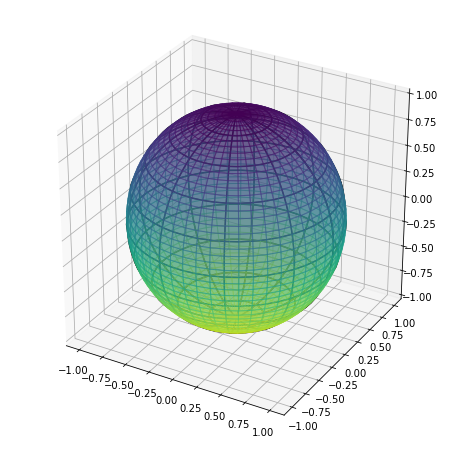

In [2]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
u = np.linspace(0,pi,50)
v = np.linspace(0,2*pi,50)
U,V = np.meshgrid(u,v)
mc = cm.viridis((2-2*cos(U))/4)
ax.plot_surface(sin(U)*cos(V),sin(U)*sin(V),cos(U),alpha=.5,cmap='viridis',facecolors=mc)
ax.plot_wireframe(sin(U)*cos(V),sin(U)*sin(V),cos(U),alpha=1,color='k',rcount=10,ccount=10);


# Flux Integrals

A **flux integral** of a vector field $\vec F$ through a surface $\Omega$ (somethimes just the "surface integral of a vector field") with orientation $\vec N$ corresponding to parametrization $\vec r:\mathcal D \to \RR^3$ is 

$$\iint_\Omega \vec F\cdot d\vec S = \iint_\Omega \vec F \cdot \vec N\,dS$$

  - Where? on a 2D surface $\Omega$ in $\RR^3$.

  - What? a vector field $\vec F$.

  - How? In the (positive) direction perpendicular to the surface.

$$= \iint_D \vec F(\vec r(u,v))\cdot \frac{r_u\times \vec r_v}{|\vec r_u \times \vec r_v|} |\vec r_u \times \vec r_v|\,dA $$

$$= \iint_D \vec F(\vec r(u,v))\cdot \vec r_u\times \vec r_v\,dA $$

That integrand $\vec F(\vec r(u,v))\cdot \vec r_u\times \vec r_v$ is a triple-product, or, rather, a volume of a parallelopiped, two sides defined by the surface, and one by the vector field.  

In [3]:
@interact
def _(angle=(-96,6,6),vangle=(0,90,6),
     F=fixed(lambda x,y,z: 1/3*np.array([1+x,1+y,1])),
     r=fixed(lambda u,v: np.array([u,v+u/4,1/2-u**2/10-v**2/10])),
     ru=fixed(lambda u,v: np.array([1,1/4,-u*2/10])),
     rv=fixed(lambda u,v: np.array([0,1,-v*2/10])),
     level=(1,4,1)):
    u = v = np.linspace(0,1,100)
    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')
    U,V = np.meshgrid(u,v)
    ax.plot_surface(*r(U,V),alpha=.6)
    U,V = np.meshgrid([0,1],[0,1])
    for pt in [(i,j) for i in np.arange(0,1,1/level) for j in np.arange(0,1,1/level)]:
        x = r(*pt)
        a = ru(*pt)
        b = rv(*pt)
        c = 0*np.cross(a,b)
        ax.plot_surface((r(*pt)[0] + U/level*(ru(*pt)[0]) + V/level*(rv(*pt)[0])),
                        (r(*pt)[1] + U/level*(ru(*pt)[1]) + V/level*(rv(*pt)[1])),
                        (r(*pt)[2] + U/level*(ru(*pt)[2]) + V/level*(rv(*pt)[2])),alpha=.6,color='r')
        ax.quiver(r(*pt)[0]*np.ones(3),r(*pt)[1]*np.ones(3),r(*pt)[2]*np.ones(3),
                  [a[0],b[0],c[0]],[a[1],b[1],c[1]],[a[2],b[2],c[2]],length=1/level,color='k');
        ax.quiver(r(*pt)[0],r(*pt)[1],r(*pt)[2],
                  F(*r(*pt))[0],F(*r(*pt))[1],F(*r(*pt))[2],length=1,color='b');
    x = r(0,0)
    a = ru(0,0)
    b = rv(0,0)
    c = F(*r(0,0))
    for v1,v2 in [[(x+(a+b)/level),(x+(a+b)/level+c)],
             [(x+(a)/level),(x+(a)/level+c)],
             [(x+(b)/level),(x+(b)/level+c)],
             [(x+(a)/level+c),(x+(a+b)/level+c)],
             [(x+(b)/level+c),(x+(a+b)/level+c)],
             [(x+(a)/level+c),(x+c)],
             [(x+(b)/level+c),(x+c)]]:
        ax.plot([v1[0],v2[0]],
                [v1[1],v2[1]],
                [v1[2],v2[2]],'g--')
    for ch in "xyz": 
        getattr(ax,f"set_{ch}lim")((0,1))
#     ax.quiver(0,0,1/2,1,1,1,length=.5,color='b');
    ax.view_init(vangle,angle)
#     ax.set_title(F(*r(*pt))[0])
#     ax.plot([1/2,1/2])

interactive(children=(IntSlider(value=-48, description='angle', max=6, min=-96, step=6), IntSlider(value=42, d…

### Example

Find the flux of the vector field $z\,\vec k$ through the piece of the cone $z=\sqrt{x^2 + y^2}$ below $z=2$, oriented upward.


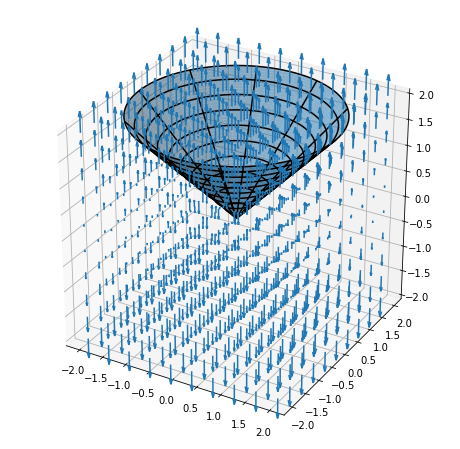

In [4]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
u = np.linspace(0,2,100)
v = np.linspace(0,2*pi,100)
U,V = np.meshgrid(u,v)
ax.plot_surface(U*cos(V),U*sin(V),U,alpha=.5)
ax.plot_wireframe(U*cos(V),U*sin(V),U,alpha=1,color='k',rcount=10,ccount=10)
u = v = np.linspace(-2,2,10)
# v = np.linspace(0,2*pi,10)
U,V,W = np.meshgrid(u,v,u)
ax.quiver(U,(V),W,0*U,0*U,W,length=.2);


### Example

Consider the constant vector field $\vec F(x,y,z) = \vec i$. Consider the surfaces

  - $\Omega_1$: piece of the plane $x=0$ for $(0 \leq y,z \leq 1$
  - $\Omega_2$: piece of the surface $x= 3y(1-y)$ for $0 \leq y,z \leq 1$

oriented in the positive $x$-direction. Through which surface is the flux of $\vec F$ greater?

In [5]:
@interact
def _(angle = (-96,6,6),p=(0,3,.5)):
    fig = plt.figure(figsize=(8,8))
    ax = fig.gca(projection='3d')
    u = np.linspace(0,1,20)
    v = np.linspace(0,1,10)
    U,V = np.meshgrid(u,v)
    ax.plot_surface(p*U*(1-U),U,V,alpha=.5)
    ax.plot_wireframe(p*U*(1-U),U,V,alpha=1,color='k',rcount=10,ccount=10)
    ax.view_init(30,angle)
    u = v = np.linspace(0,1,7)
    # v = np.linspace(0,2*pi,10)
    U,V,W = np.meshgrid(u,v,u)
    ax.quiver(U,V,W,np.ones_like(U),0*U,0*U,length=.2);


interactive(children=(IntSlider(value=-48, description='angle', max=6, min=-96, step=6), FloatSlider(value=1.0…

### Example

Consider the same example except with changing vector field $\vec F(x,y,z) = x\vec i$. Consider the surfaces

  - $\Omega_1$: piece of the plane $x=0$ for $(0 \leq y,z \leq 1$
  - $\Omega_2$: piece of the surface $x= 3y(1-y)$ for $0 \leq 2,z \leq 1$

oriented in the positive $x$-direction. Through which surface is the flux of $\vec F$ greater?

In [6]:
@interact
def _(angle = (-96,6,6),p=(0,3.,.5)):
    fig = plt.figure(figsize=(8,8))
    ax = fig.gca(projection='3d')
    u = np.linspace(0,1,20)
    v = np.linspace(0,1,15)
    U,V = np.meshgrid(u,v)
    ax.plot_surface(p*U*(1-U),U,V,alpha=.5)
    ax.plot_wireframe(p*U*(1-U),U,V,alpha=1,color='k',rcount=10,ccount=10)
    u = v = np.linspace(0,1,7)
    # v = np.linspace(0,2*pi,10)
    ax.view_init(30,angle)
    U,V,W = np.meshgrid(u,v,u)
    ax.quiver(U,V,W,U,0*U,0*U,length=.2);


interactive(children=(IntSlider(value=-48, description='angle', max=6, min=-96, step=6), FloatSlider(value=1.5…

## Divergence

Divergence is a scalar measurement on a vector field $ \vec F(x,y,z) = P(x,y,z) \,\vec i + Q(x,y,z) \,\vec j + R(x,y,z)  \,\vec k$. 

$$ \operatorname{div} \vec F = \nabla \cdot \vec F = P_x +Q_y + R_z $$

It measures the degree to which a vector field is "expanding" or "spreading out". 

For example, 
  
  - positive divergence ("source"): $x\vec i + y\, \vec j $

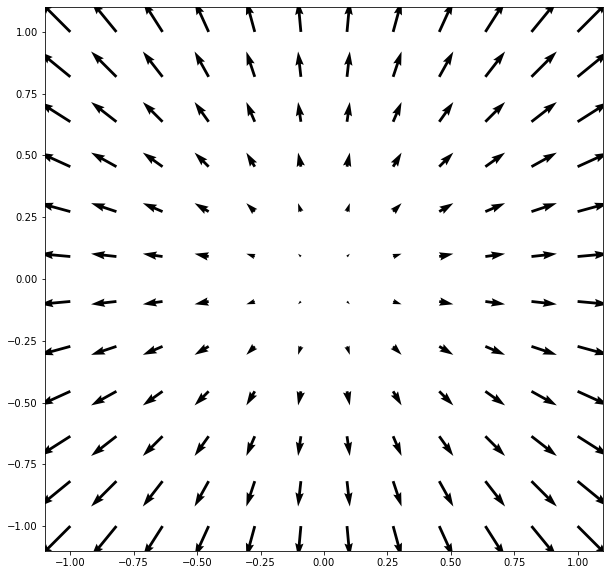

In [7]:
x,y = np.meshgrid(np.linspace(-1,1,12),np.linspace(-1,1,12))

plt.quiver(x,y,x,y);

For example, 
  
  - negative divergence ("sink"): $-x\vec i - y\, \vec j $

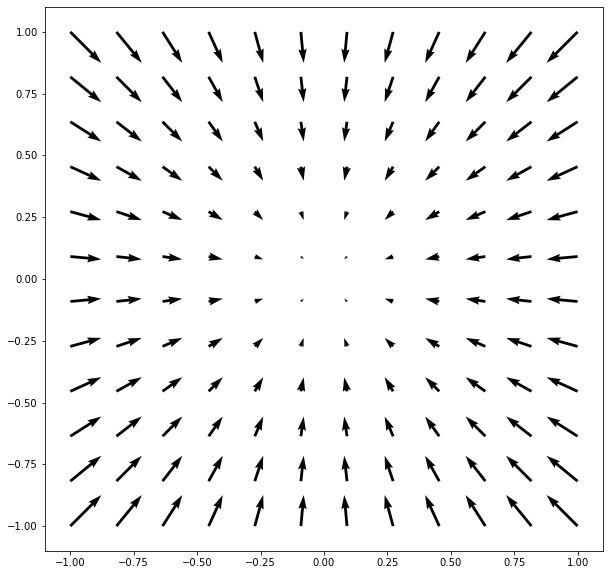

In [8]:
x,y = np.meshgrid(np.linspace(-1,1,12),np.linspace(-1,1,12))

plt.quiver(x,y,-x,-y);

For example, 
  
  - zero divergence ("incompressible"): $y\vec i + x\, \vec j $

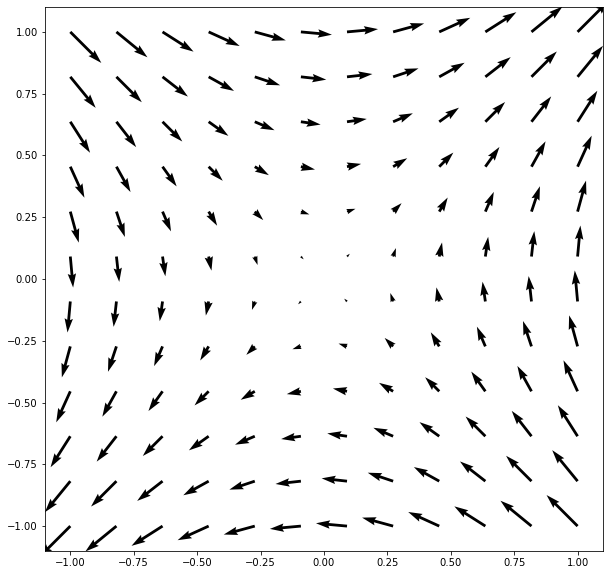

In [9]:
x,y = np.meshgrid(np.linspace(-1,1,12),np.linspace(-1,1,12))

plt.quiver(x,y,y,x);

## The Divergence Theorem

Let $E$ be a solid region in $\RR^3$ and $\Omega = \partial E$ its outward-oriented boundary. If $\vec F(x,y,z)$ is a smooth vector field, then

$$ \iint_{\Omega} \vec F \cdot d \vec S = \iiint_E \nabla \cdot \vec F\,dV$$

#### How to remember DT

  - Champagne
![Mets' Terry CVollins spraying champagne in 2015](https://1.bp.blogspot.com/-UEzDm6Zzhco/ViioEBfuJVI/AAAAAAAAfak/Wv_PQY8hs-w/s1600/-fa3579127e7e3ceb.JPG)

Terry Collins knows the Divergence Theorem. 

## Examples

Compute the flux of the radial vector field $x\,\vec i + y\,\vec j + z\,\vec k$ through the outward-oriented unit sphere. 
  
  

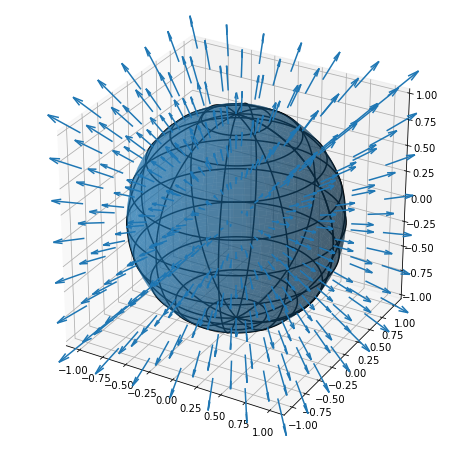

In [10]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
u = np.linspace(0,pi,100)
v = np.linspace(0,2*pi,100)
U,V = np.meshgrid(u,v)
ax.plot_surface(sin(U)*cos(V),sin(U)*sin(V),cos(U),alpha=.5)
ax.plot_wireframe(sin(U)*cos(V),sin(U)*sin(V),cos(U),alpha=1,color='k',rcount=10,ccount=10)
u = v = np.linspace(-1,1,7)
# v = np.linspace(0,2*pi,10)
U,V,W = np.meshgrid(u,v,u)
ax.quiver(U,(V),W,U,V,W,length=.2);


### Revisit Cone

Find the flux of the vector field $z\,\vec k$ through the piece of the cone $z=\sqrt{x^2 + y^2}$ below $z=2$, oriented upward.
  
  

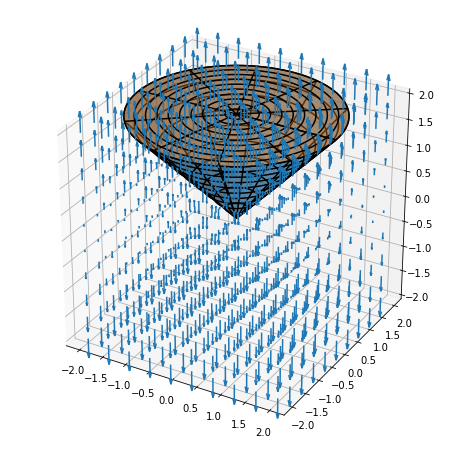

In [11]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
u = np.linspace(0,2,100)
v = np.linspace(0,2*pi,100)
U,V = np.meshgrid(u,v)
ax.plot_surface(U*cos(V),U*sin(V),U,alpha=.5)
ax.plot_wireframe(U*cos(V),U*sin(V),U,alpha=1,color='k',rcount=10,ccount=10)
ax.plot_surface(U*cos(V),U*sin(V),2*np.ones_like(U),alpha=.5)
ax.plot_wireframe(U*cos(V),U*sin(V),2*np.ones_like(U),alpha=1,color='k',rcount=10,ccount=10)
u = v = np.linspace(-2,2,10)
# v = np.linspace(0,2*pi,10)
U,V,W = np.meshgrid(u,v,u)
ax.quiver(U,(V),W,0*U,0*U,W,length=.2);


### Fishing in a river

How could we know the two surfaces in the earlier example had the same flux?

In [12]:
@interact
def _(angle = (-96,6,6),caps=False):
    fig = plt.figure(figsize=(8,8))
    ax = fig.gca(projection='3d')
    u = np.linspace(0,1,20)
    v = np.linspace(0,1,10)
    U,V = np.meshgrid(u,v)
    ax.plot_surface(0*U*(1-U),U,V,alpha=.5)
    ax.plot_wireframe(0*U*(1-U),U,V,alpha=1,color='k',rcount=10,ccount=10)
    ax.plot_surface(3*U*(1-U),U,V,alpha=.5)
    ax.plot_wireframe(3*U*(1-U),U,V,alpha=1,color='k',rcount=10,ccount=10)
    if caps:
        ax.plot_surface(3*V*U*(1-U),U,np.ones_like(V),alpha=.5)
        ax.plot_wireframe(3*V*U*(1-U),U,np.ones_like(V),alpha=1,color='k',rcount=10,ccount=10)
        ax.plot_surface(3*V*U*(1-U),U,np.zeros_like(V),alpha=.5)
        ax.plot_wireframe(3*V*U*(1-U),U,np.zeros_like(V),alpha=1,color='k',rcount=10,ccount=10)
    ax.view_init(30,angle)
    u = v = np.linspace(0,1,7)
    # v = np.linspace(0,2*pi,10)
    U,V,W = np.meshgrid(u,v,u)
    ax.quiver(U,V,W,np.ones_like(U),0*U,0*U,length=.2);


interactive(children=(IntSlider(value=-48, description='angle', max=6, min=-96, step=6), Checkbox(value=False,…

Let $\Omega_1$ and $\Omega_2$ be as before (with a negative sign indicating an opposite orientation) and $T_1$ and $T_0$ be the enclosing, upward-oriented "caps" to the solid at $z=1$ and $z=0$, respectively. 

$$ \iint_{\Omega_2} \vec F\cdot d\vec S + \iint_{-\Omega_1} \vec F\cdot d\vec S + \iint_{T_1} \vec F\cdot d\vec S + \iint_{-T_0} \vec F\cdot d\vec S = \iiint_E \nabla\cdot \vec F\,dV $$ 

$$ \iint_{\Omega_2} \vec F\cdot d\vec S - \iint_{\Omega_1} \vec F\cdot d\vec S = 0 $$ 

### Exercise

In the example immediately above, change the vector field to $x\,\vec i$ and use the Divergence Theorem to compute the flux through $\Omega_2$. 

## Example - Gauss's Law

The Divergence Theorem is also known as Gauss's Theorem. A clever consequence of it in electrostatics is Gauss's Law.

$$\iint_{\Sigma} \vec E\cdot d\vec S = \frac{Q}{\varepsilon_0}  $$ where $\vec E$ is the electric field, $\varepsilon$ is the permittivity, $\Sigma$ is a closed surface, and $Q$ is the total charge contained therein.

In other words, the flux through a surface is independent of shape, but only depends on the amount of surrounded charge. 



In [13]:
@interact(t=(0,1,.04))
def _(t=0,angle=(-30,120,6)):
    fig = plt.figure(figsize=(11,11))
    ax = fig.gca(projection='3d')
    u = np.linspace(0,1,55)
    v = np.linspace(0,1,55)
    U,V = np.meshgrid(u,v)
    rd = pi*sqrt(U - U**2) - U*sin(pi*U)**2
    p,q,r = U*pi, rd*cos(V*pi),rd*sin(V*pi)
    ax.plot_surface(p,cos(t)*(2 + q) - sin(t)*r - 2,sin(t)*(2 + q) + cos(t)*r,color=(.3,.8,.5,.4))
    ax.plot_wireframe(p,cos(t)*(2 + q) - sin(t)*r - 2,sin(t)*(2 + q) + cos(t)*r,alpha=1,color='k',rcount=6,ccount=6)
    ax.plot_surface(p,q,-r,color=(.3,1,.5,.4))
    ax.plot_wireframe(p,q,-r,alpha=1,color='k',rcount=6,ccount=6)
    rd = sqrt(U - U**2)
    p,q,r = U + 1/2, rd*cos(V*pi),rd*sin(V*pi)
    ax.plot_surface(p,cos(t)*(2 + q) - sin(t)*r - 2,sin(t)*(2 + q) + cos(t)*r,color=(.3,1,.5,.4))
    ax.plot_wireframe(p,cos(t)*(2 + q) - sin(t)*r - 2,sin(t)*(2 + q) + cos(t)*r,alpha=1,color='k',rcount=4,ccount=4)
    ax.plot_surface(p,q,-r,color=(.3,1,.5,.4))
    ax.plot_wireframe(p,q,-r,alpha=1,color='k',rcount=4,ccount=4)

    ax.view_init(30,angle)
#     u = v = np.linspace(0,1,7)
#     # v = np.linspace(0,2*pi,10)
#     U,V,W = np.meshgrid(u,v,u)
#     ax.quiver(U,V,W,np.ones_like(U),0*U,0*U,length=.2);
    for c in 'xz':
        getattr(ax,f"set_{c}lim")((0,4))
    ax.set_ylim((-2,2))


interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.04), IntSlider(value=42, descrip…